In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [9]:
df = pd.read_csv('data\\processed\\marketing_campaign_pca.csv')

df.drop(columns=['ID'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     2029 non-null   float64
 1   PC2     2029 non-null   float64
 2   PC3     2029 non-null   float64
 3   PC4     2029 non-null   float64
 4   PC5     2029 non-null   float64
 5   PC6     2029 non-null   float64
 6   PC7     2029 non-null   float64
dtypes: float64(7)
memory usage: 111.1 KB


## Visualisation des clusters trouvés par k-means . 
## Non concluant ❌ ( car forme non sphérique )

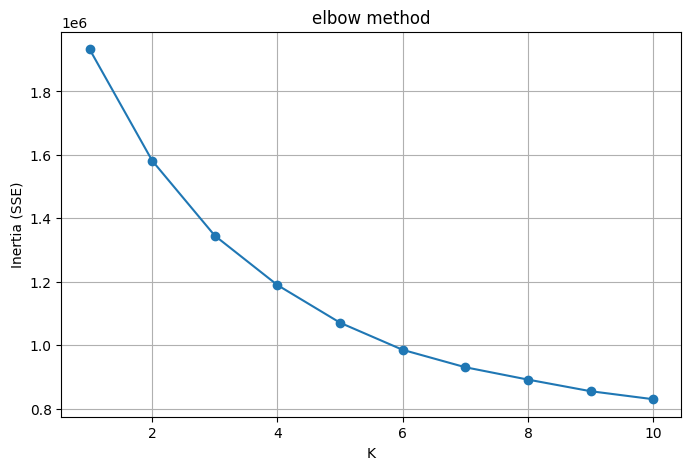

In [10]:
inertias = []

# Tester de K = 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("elbow method")
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

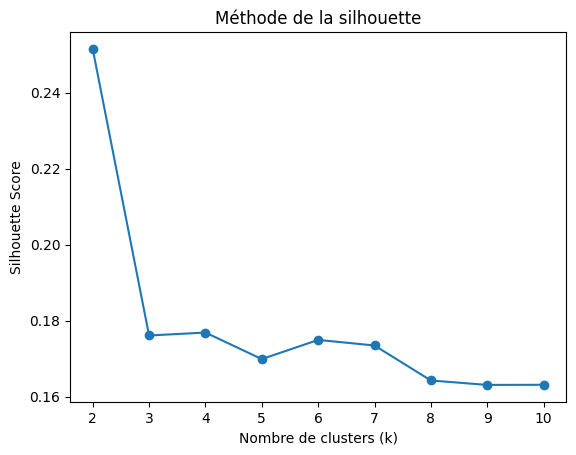

In [11]:
from sklearn.metrics import silhouette_score



silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode de la silhouette")
plt.show()

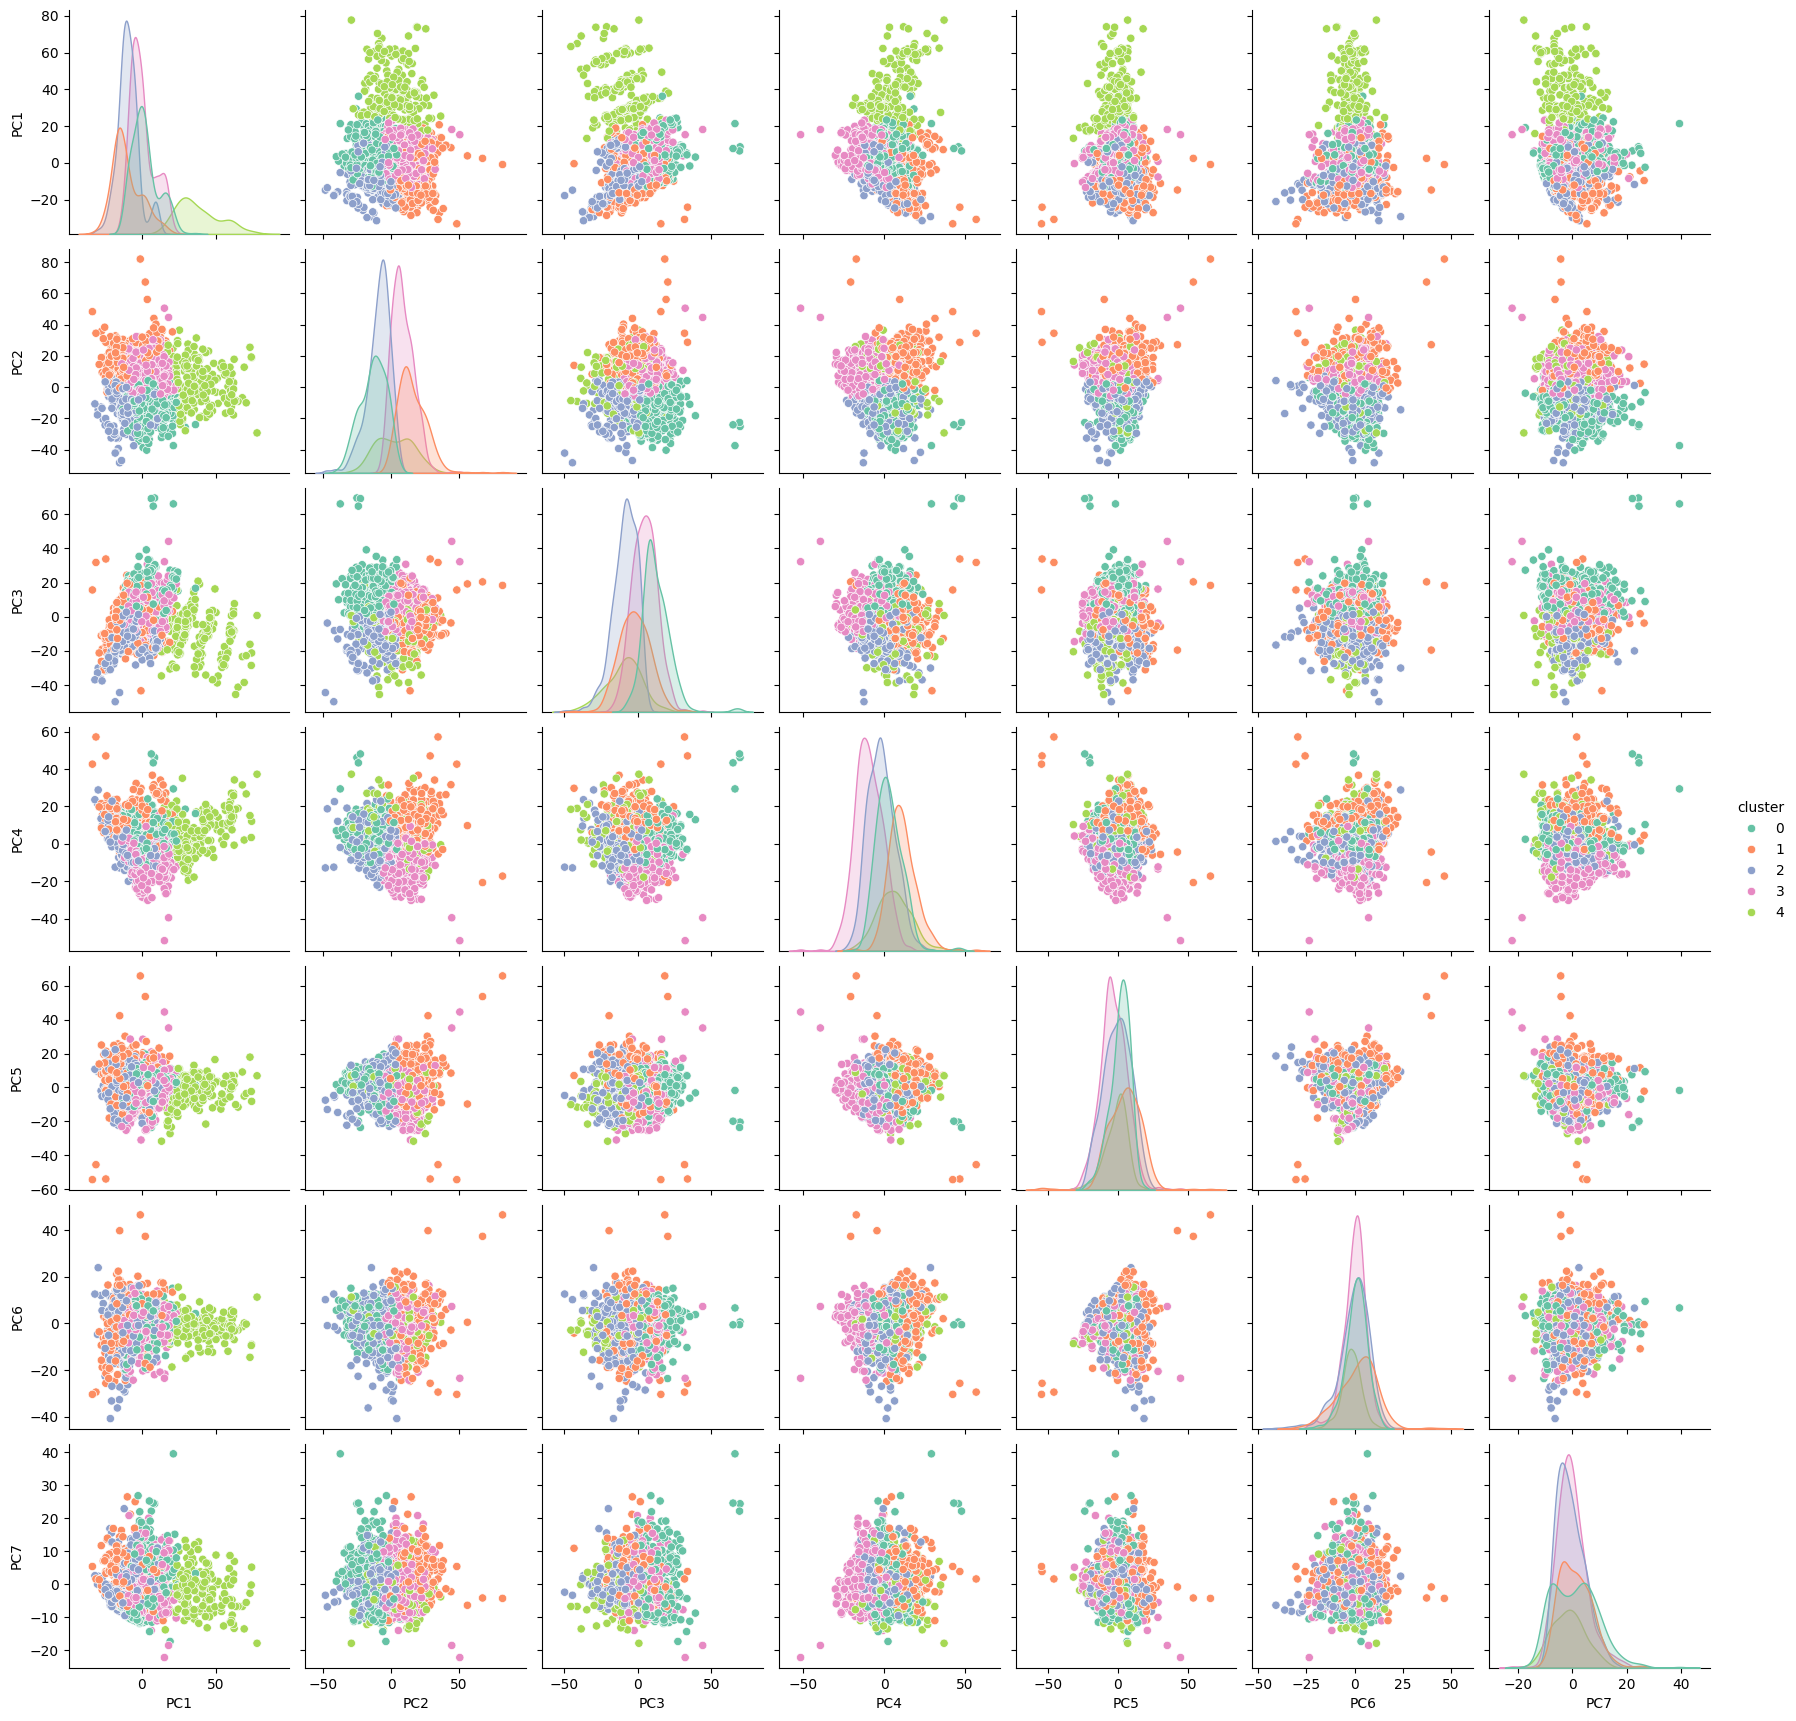

In [12]:

kmeans = KMeans(n_clusters= 5, random_state=42)  # n_clusters = nombre de clusters 
kmeans.fit(df)
# création de la variable labels qui correspond a chaque point
labels = kmeans.labels_


df['cluster'] = labels

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

## GMM (Gaussian Mixture Model)

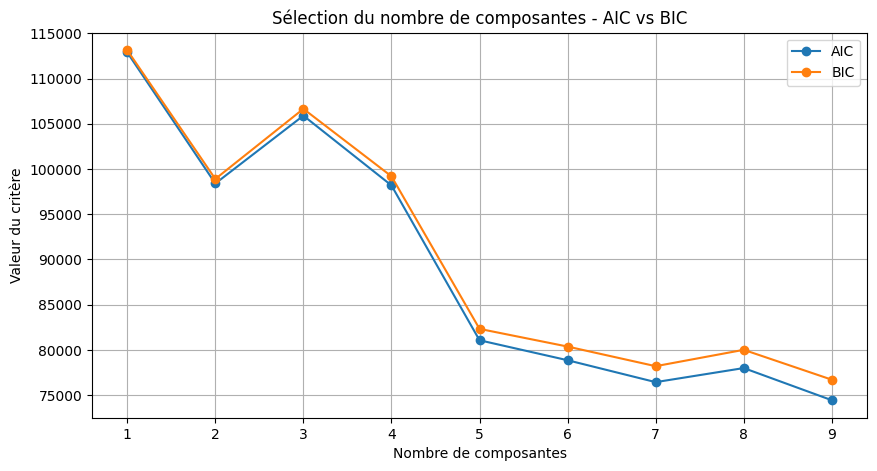

In [13]:
aic = []
bic = []
n_components_range = range(1, 10)

# 3. Test de plusieurs nombres de composantes
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df)
    aic.append(gmm.aic(df))
    bic.append(gmm.bic(df))

# 4. Affichage des résultats
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic, label='AIC', marker='o')
plt.plot(n_components_range, bic, label='BIC', marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Valeur du critère')
plt.title('Sélection du nombre de composantes - AIC vs BIC')
plt.legend()
plt.grid(True)
plt.show()

## 📊 Analyse des résultats AIC/BIC

### **Observations du graphique :**

1. **📉 Tendance générale :** Les deux courbes **diminuent** de K=1 à K=9, ce qui est un bon signe
   
2. **🔍 Points d'inflexion notables :**
   - **AIC** : Diminution forte jusqu'à K=3, puis plus graduelle
   - **BIC** : Diminution marquée jusqu'à K=3, légère remontée à K=4-5, puis baisse continue

3. **⚖️ Comparaison AIC vs BIC :**
   - **AIC** semble continuer à baisser même à K=9 (favorise plus de composantes)
   - **BIC** montre une stabilisation relative autour de K=7-9 (préfère la simplicité)

### **🎯 Recommandations basées sur ces résultats :**

- **K=3** : Premier point d'inflexion significatif (bon compromis simplicité/performance)
- **K=7-9** : Zone de stabilisation du BIC (modèles plus complexes mais stables)

### **🔄 Prochaine étape :** 
Utilisons le **Silhouette Score** pour trancher entre ces candidats et valider le choix optimal !

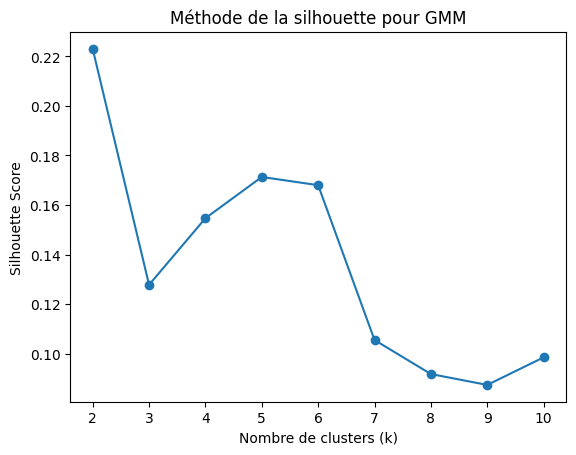

Silhouette Score optimal à K = 2
Score maximal: 0.223


In [14]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42) 
    gmm.fit(df)
    score = silhouette_score(df, gmm.predict(df)) 
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Méthode de la silhouette pour GMM")
plt.show()

print(f"Silhouette Score optimal à K = {k_range[silhouette_scores.index(max(silhouette_scores))]}")
print(f"Score maximal: {max(silhouette_scores):.3f}")

## test avec avec k=8



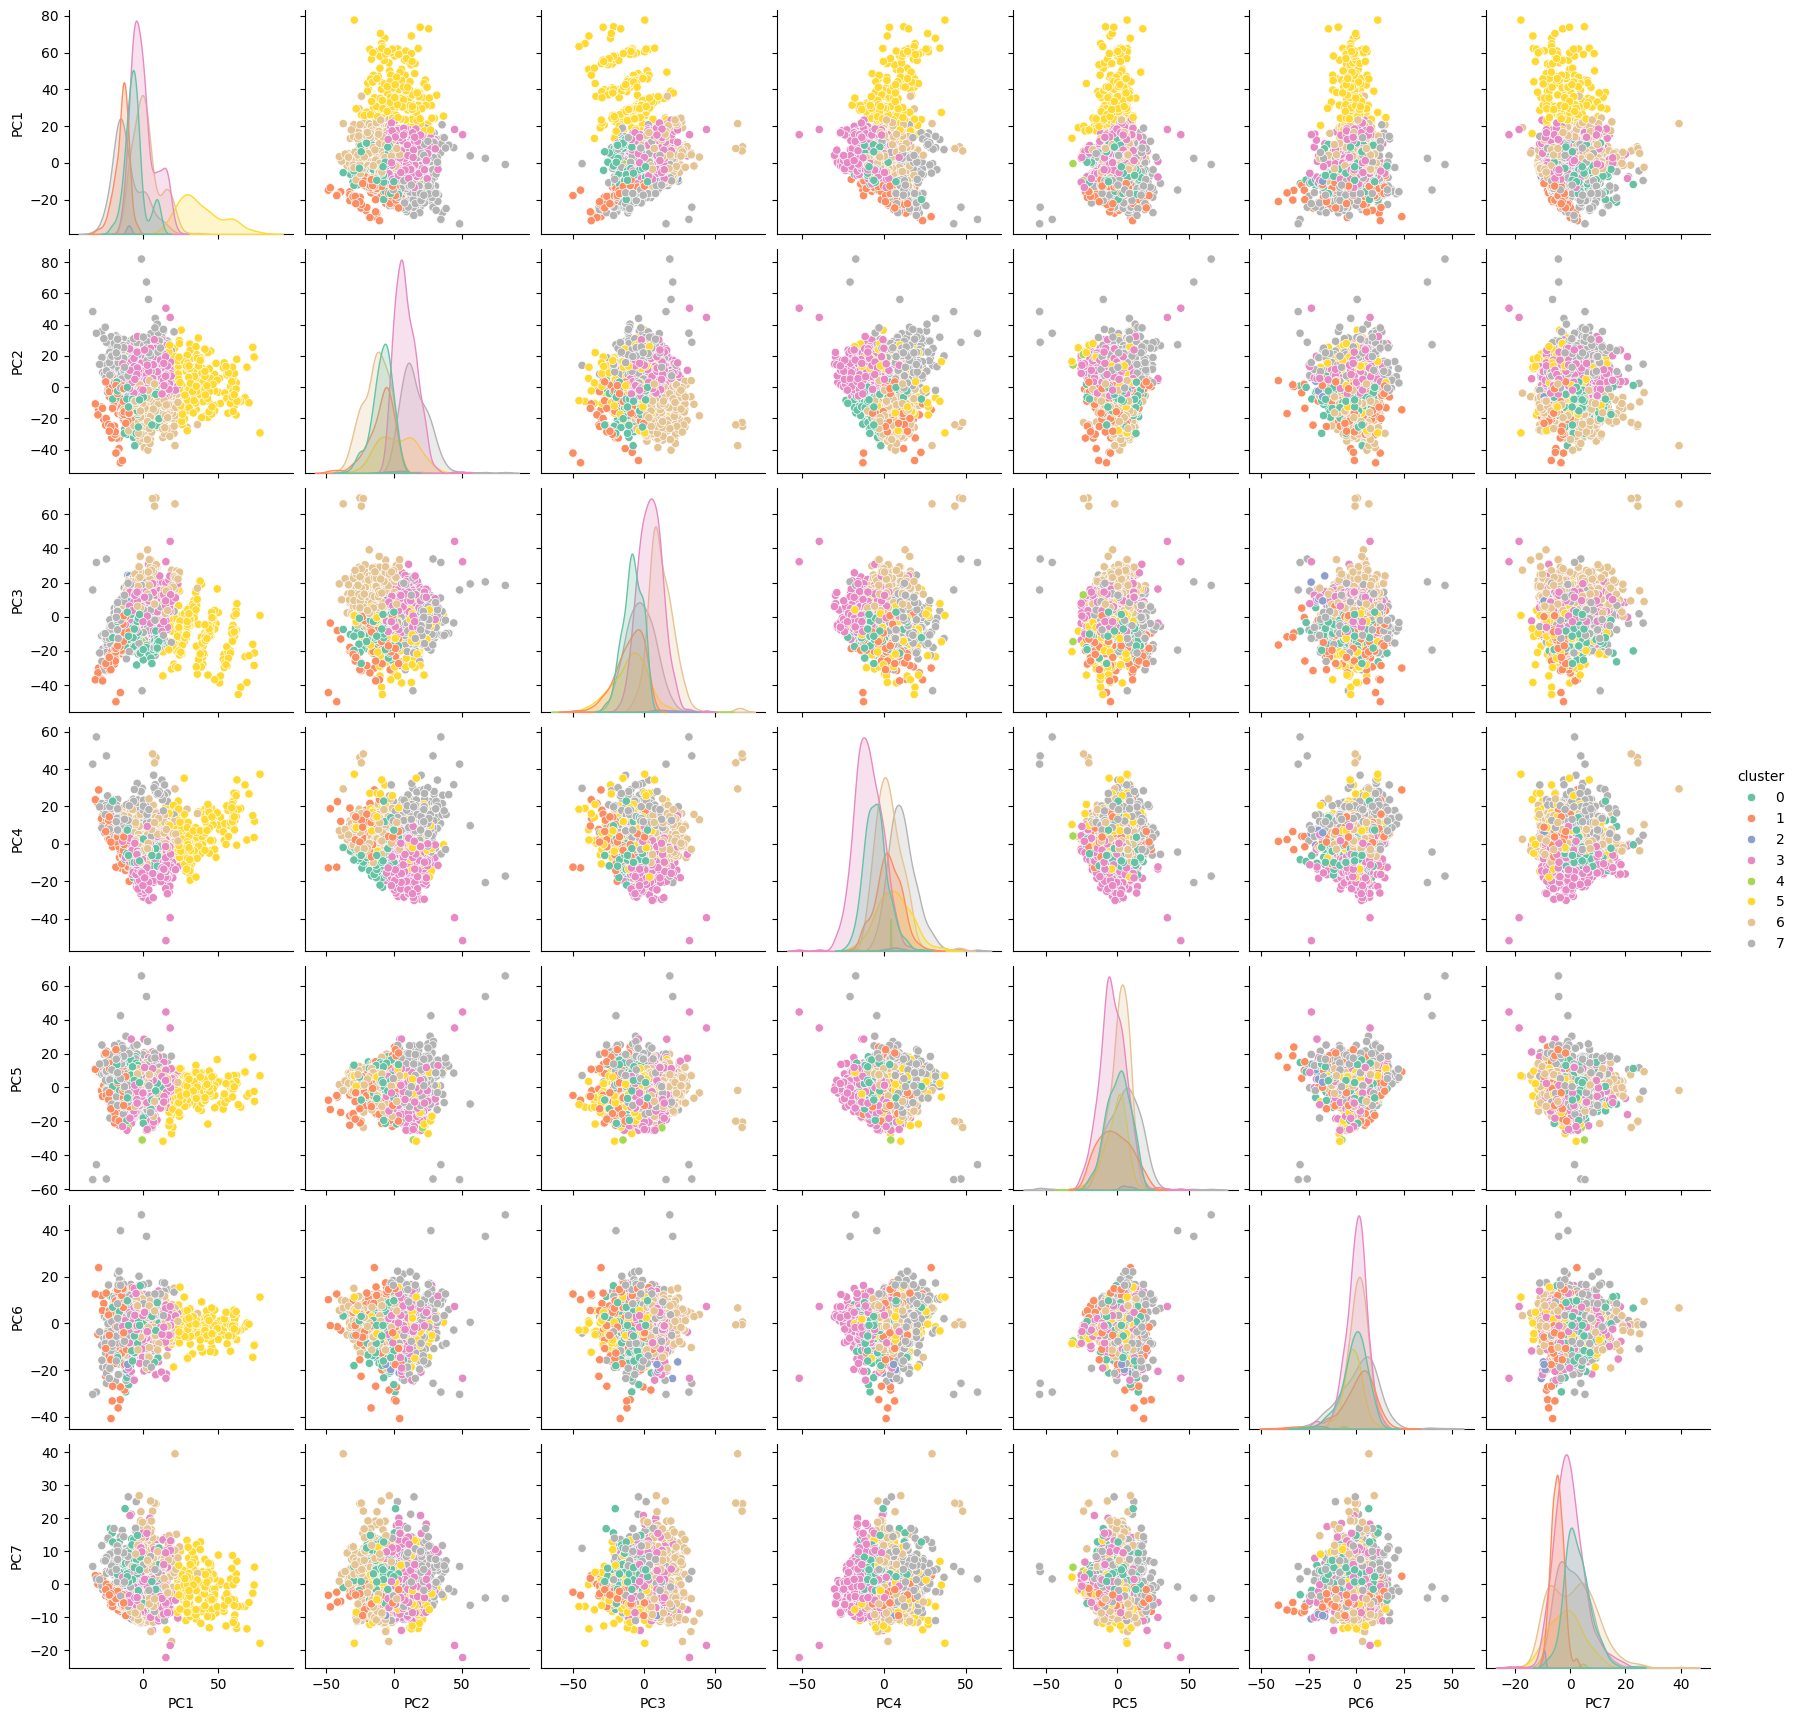

In [15]:
gmm = GaussianMixture(n_components= 8, random_state=42)   
labels = gmm.fit_predict(df)
# création de la variable labels qui correspond a chaque point

df['cluster'] = labels

# Tri du DataFrame par cluster pour une meilleure lisibilité
df_sorted = df.sort_values('cluster').reset_index(drop=True)

# Sauvegarde du DataFrame trié avec les clusters GMM
df_sorted.to_csv('data/clusters/gmm.csv', index=False)

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

In [16]:
df.groupby('cluster').mean(numeric_only=True)

PC1        PC2        PC3        PC4        PC5        PC6  \
cluster                                                                     
0        -5.465225  -8.975174  -8.157873  -5.002982   0.577980  -1.117402   
1       -14.106326  -9.812727 -10.073330   2.572439  -1.971262   0.359149   
2        -9.260596   1.628697  14.482969   6.047664   6.529401 -19.791677   
3         0.294106   8.341384   4.501909  -9.705727  -3.064975  -0.172760   
4        -5.047538  17.547898  -0.921234   4.087881 -27.378151  -6.723655   
5        37.879469   2.401010  -9.719107   6.026688  -1.530724  -1.722338   
6         2.223304 -13.384009  12.325395   2.994239   1.334982   0.858083   
7       -10.039363  15.595617  -2.298070  11.180049   5.021385   1.336085   

              PC7  
cluster            
0        2.508010  
1       -4.795869  
2       -9.670890  
3       -0.347464  
4        4.547052  
5       -1.605110  
6        1.135810  
7        1.168429

In [17]:
df['cluster'].value_counts().sort_index()



cluster
0    309
1    228
2      5
3    545
4      2
5    194
6    403
7    343
Name: count, dtype: int64

## test avec k=5

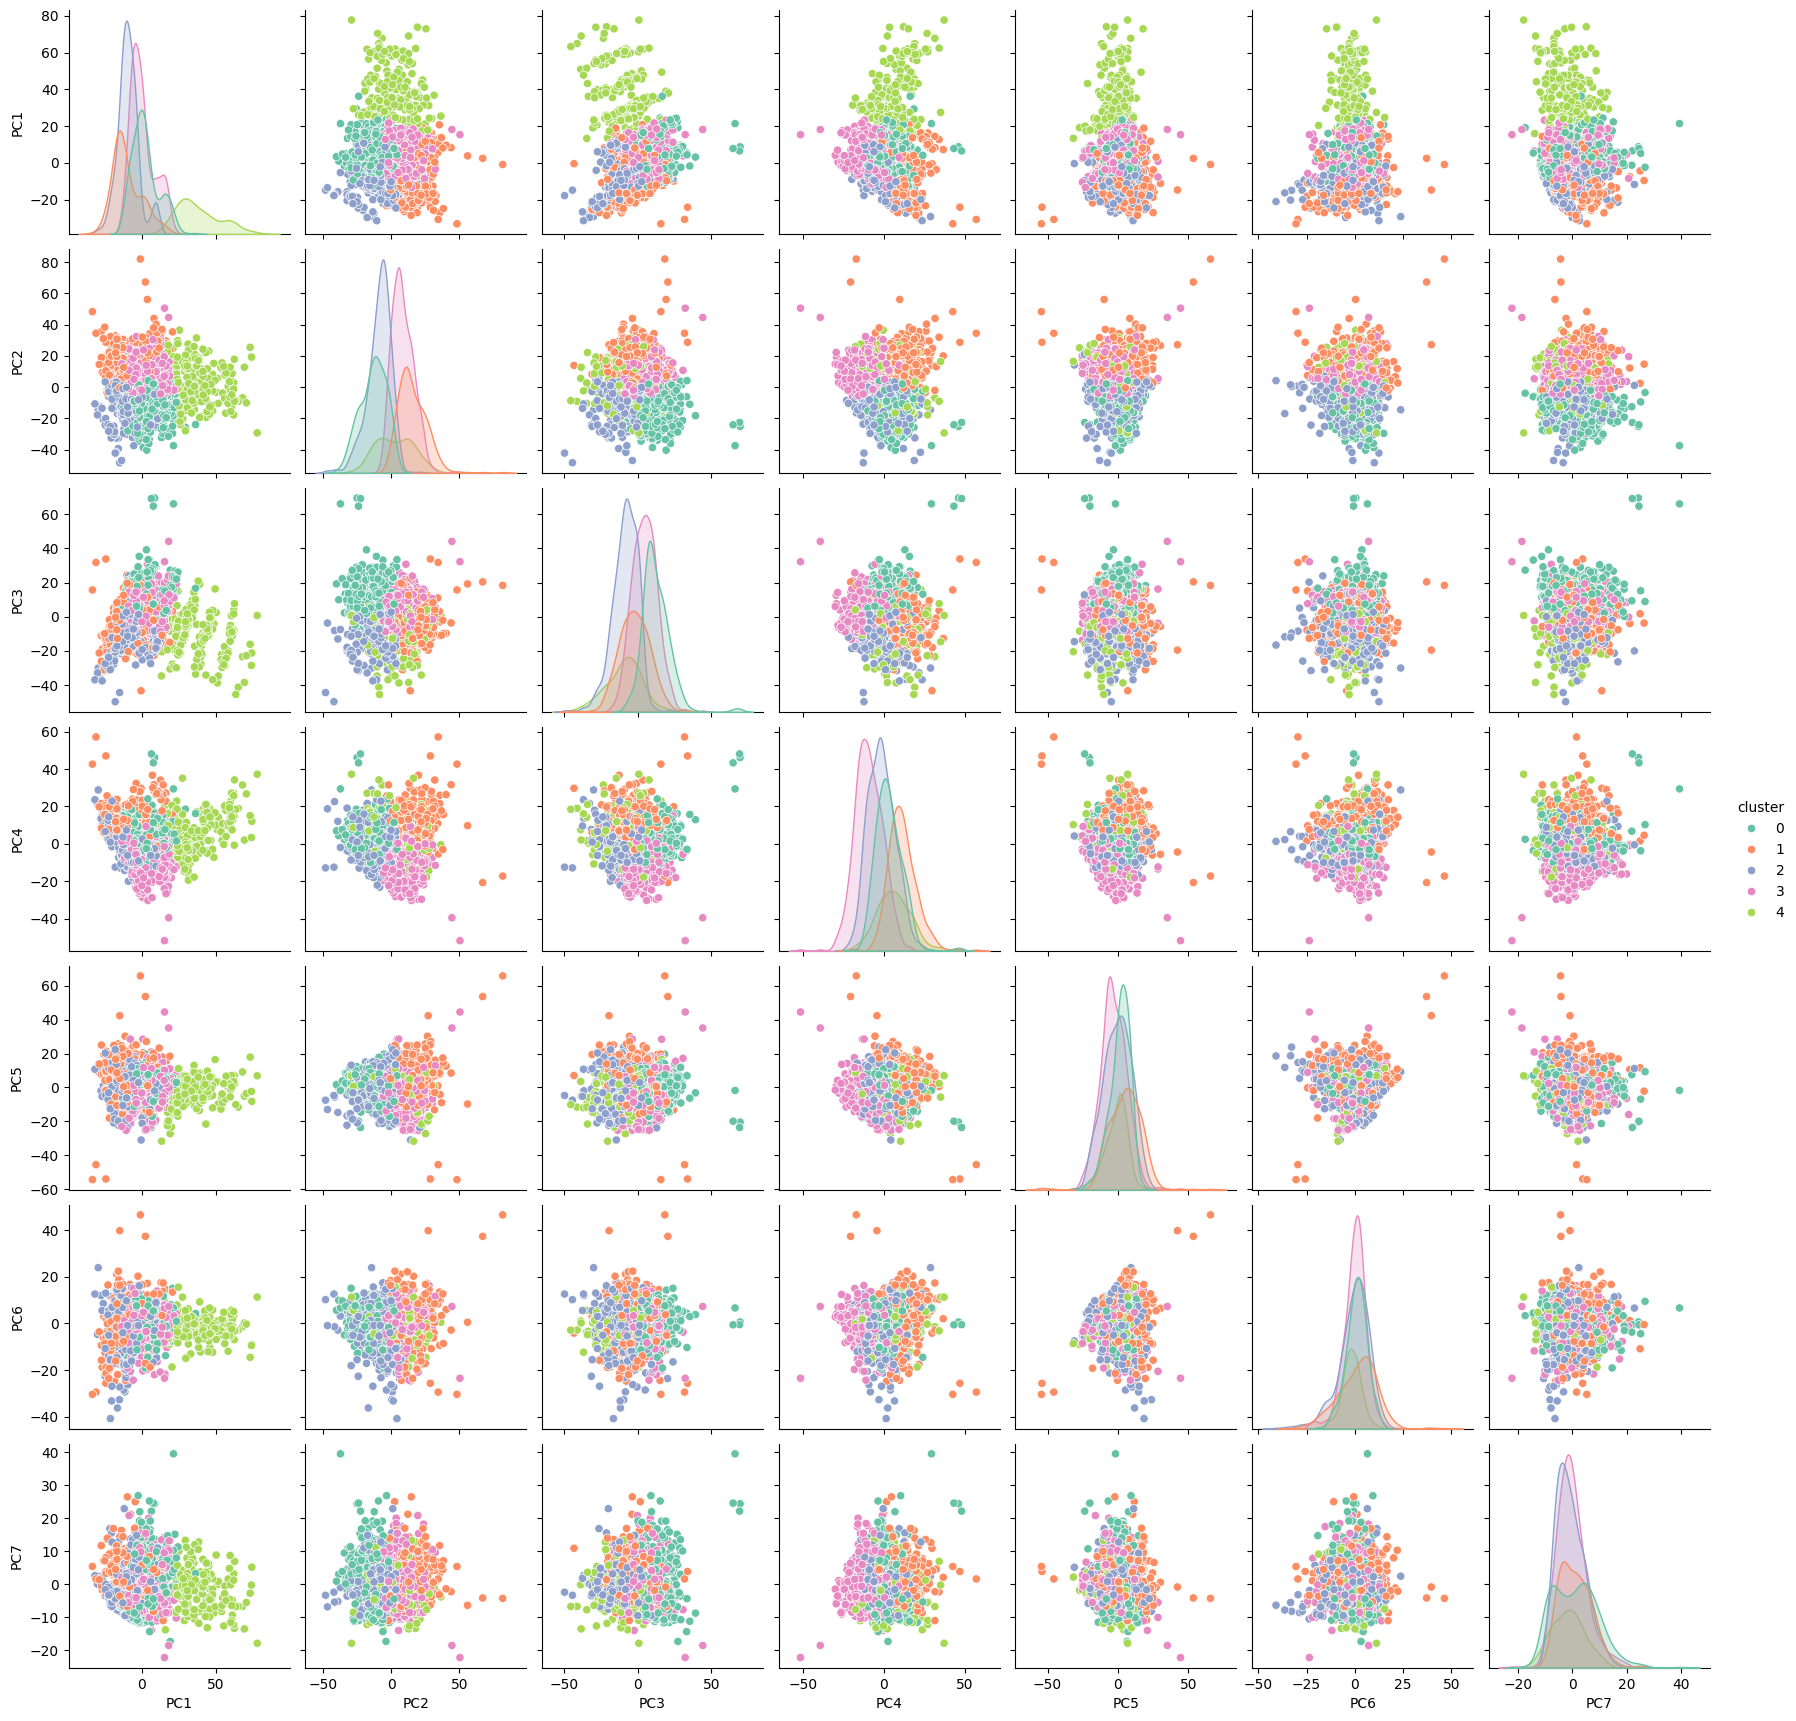

In [18]:
gmm = GaussianMixture(n_components= 5, random_state=42)   
labels = gmm.fit_predict(df)
# création de la variable labels qui correspond a chaque point

df['cluster'] = labels

# Tri du DataFrame par cluster pour une meilleure lisibilité
df_sorted = df.sort_values('cluster').reset_index(drop=True)

# Sauvegarde du DataFrame trié avec les clusters GMM
df_sorted.to_csv('data/clusters/gmm.csv', index=False)

# affichage de cluster pour chaque pair de colonne ( en 2D car c'est difficile de visualiser en 3D et + )
sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()

In [19]:
import plotly.express as px

fig = px.scatter_3d(df,
                    x='PC1', 
                    y='PC2', 
                    z='PC3',
                    color='cluster',
                    color_discrete_sequence=px.colors.qualitative.Set2,
                    title="3D Cluster Visualization")
fig.show()

In [20]:
df.groupby('cluster').mean(numeric_only=True)



PC1        PC2        PC3        PC4       PC5       PC6  \
cluster                                                                   
0         2.223304 -13.384009  12.325395   2.994239  1.334982  0.858083   
1       -10.039363  15.595617  -2.298070  11.180049  5.021385  1.336085   
2        -9.120211  -9.131234  -8.725974  -1.692999 -0.538532 -0.690803   
3         0.294106   8.341384   4.501909  -9.705727 -3.064975 -0.172760   
4        37.879469   2.401010  -9.719107   6.026688 -1.530724 -1.722338   

              PC7  
cluster            
0        1.135810  
1        1.168429  
2       -0.657617  
3       -0.347464  
4       -1.605110

In [21]:
df['cluster'].value_counts().sort_index()

cluster
0    403
1    343
2    544
3    545
4    194
Name: count, dtype: int64

il y a peut etre trop de colonne , nous n'arrivons pas a donner de noms aux groupes formés , peut etre que le nombre de cluster devrait etre 3 car la il y a 2 cluster sur 5 qui sont a 8 et 1 lignes sur 2500. Le csv , ca serait peut etre mieux de garder le mien pour vraiment savoir quelle type de données sont utilisé pour créer les clusters 